- Joel Konitzer
- 4/17/2022
- Week 6 / EDA
- Data Analytics

I. Introduction: This analysis aimed to demonstrate unsupervised machine learning using the KMeans algorithm. The data used contained measurements of various components found in wine from 3 separate cultivators. The KMeans algorithm allows us to visualize natural groupings within the data, and the groupings vary depending on how the data is prepared before fitting the algorithm. For this analysis, KMeans is used with scaled and unscaled data to demonstrate its effect on the results. 

*II. Methods & Code **III. Results/Output ***IV. Analysis of Results

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('dark_background')

In [3]:
df = pd.read_csv('wine_fraud.csv')

In [4]:
df.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
#Create two value pairs from df to identify the datatypes and null values
def info(df):
    null_ = df.isna().any()
    dtypes = df.dtypes
    info = pd.concat([null_,dtypes], axis=1,keys=['Null','type'])
    print(info)

In [6]:
info(df)

      Null     type
v0   False    int64
v1   False  float64
v2   False  float64
v3   False  float64
v4   False  float64
v5   False    int64
v6   False  float64
v7   False  float64
v8   False  float64
v9   False  float64
v10  False  float64
v11  False  float64
v12  False  float64
v13  False    int64


In [7]:
print('Dataframe shape:', df.shape)
df.describe().T

Dataframe shape: (178, 14)


,count,mean,std,min,25%,50%,75%,max
v0,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
v1,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
v2,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
v3,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
v4,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
v5,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
v6,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
v7,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
v8,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
v9,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


Dataset looks is clean I will not apply any transformation steps yet

In [8]:
### Drop Cultivator column since it doesnt have any descriptive value
X = df.drop('v0', axis = 1)
y = df['v0']

In [9]:
X

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


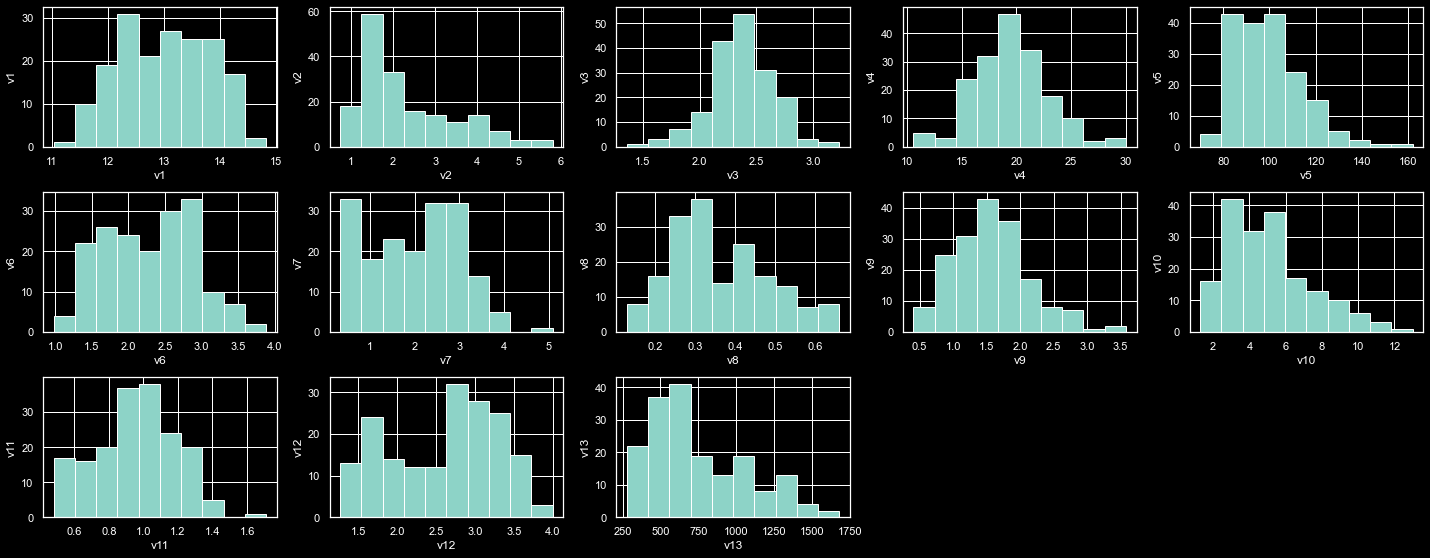

In [11]:
#Create the scatter plot
plt.figure(figsize=(20, 10))
cnt = 1


for i in X:
    plt.subplot(4,5, cnt)
    plt.hist(X[i])
    plt.ylabel(i)
    plt.xlabel(i)
    #plt.xlabel('Distance(Miles)')
    cnt=cnt+1
plt.tight_layout(pad=1)
plt.show()

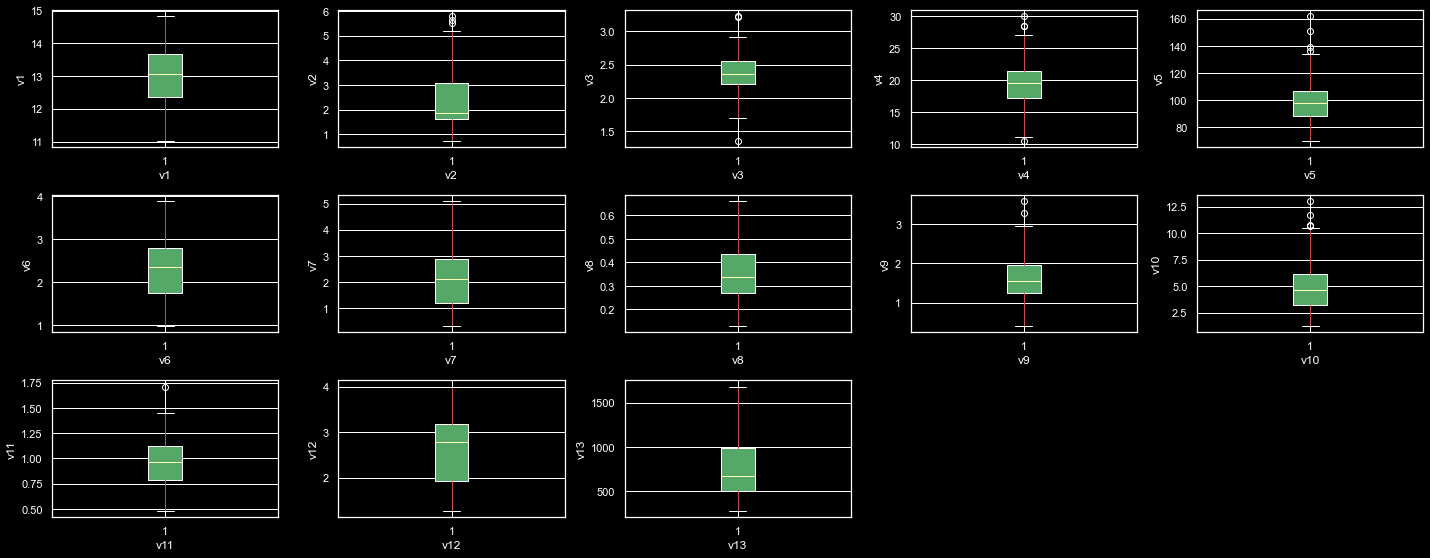

In [12]:
#Create the scatter plot
plt.figure(figsize=(20, 10))
c = 'r'
cnt = 1
for i in X.columns:
    plt.subplot(4,5, cnt)
    red_dict =  {'patch_artist': True,
             'boxprops': dict(facecolor='g'),
             'whiskerprops': dict(color='r')}
    plt.boxplot(X[i], **red_dict)
    plt.ylabel(i)
    plt.xlabel(i)
    #plt.xlabel('Distance(Miles)')
    cnt=cnt+1
    plt.tight_layout(pad=1)
plt.show()

In [13]:
from sklearn.cluster import KMeans

sum_sq = []

for n in range (2,15):
    print('Calculating for',n,'clusters')
    model = KMeans(n_clusters = n, random_state = 42)
    model.fit(X)
    sum_sq.append(model.score(X))

Calculating for 2 clusters
Calculating for 3 clusters
Calculating for 4 clusters
Calculating for 5 clusters
Calculating for 6 clusters
Calculating for 7 clusters
Calculating for 8 clusters
Calculating for 9 clusters
Calculating for 10 clusters
Calculating for 11 clusters
Calculating for 12 clusters
Calculating for 13 clusters
Calculating for 14 clusters


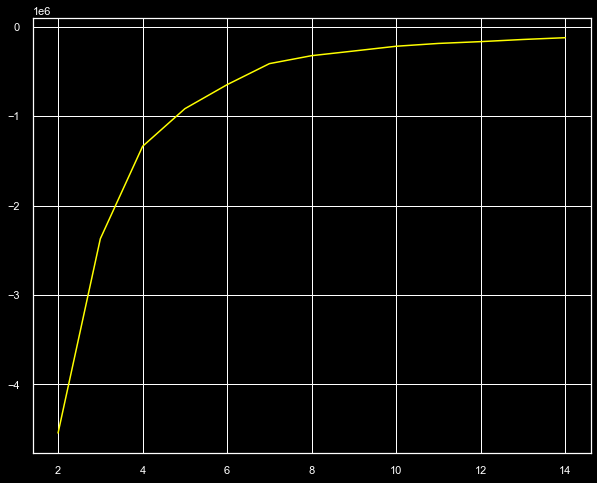

In [18]:
plt.figure(figsize=(10,8))
plt.plot(range(2,15), sum_sq, 'bx-', color='yellow')

From the skee plot it looks that our optimal k is 4. I'll verify this further through the KElbowVisualizer below and instead using the distortion metric to find the optimal K.

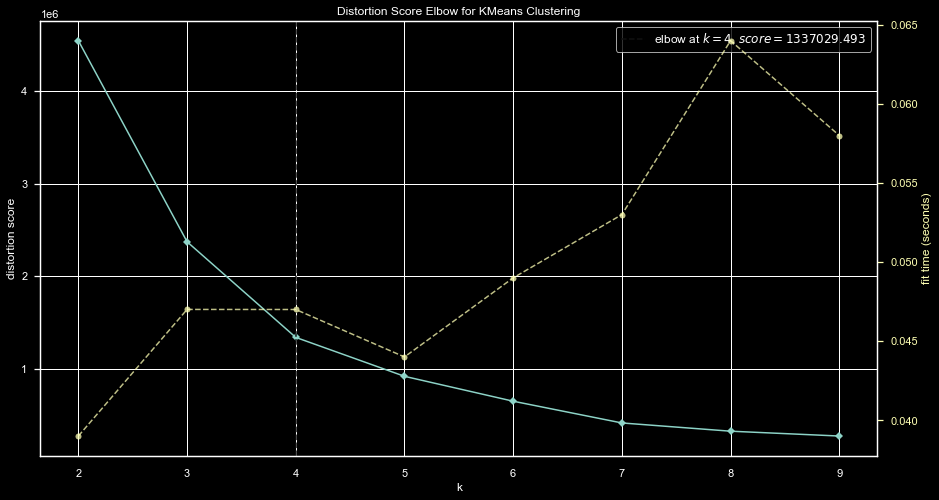

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# import libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


# create a kmeans model
model = KMeans(random_state=42)
plt.figure(figsize=(15,8))
# use the KElbowVisualizer to calculate distortion for different numbers of clusters
visualizer = KElbowVisualizer(model, metric='distortion',k=(2,10), figsize=(10,10))
visualizer.fit(X) 
visualizer.show()

Silouette score when k=4: 0.5572288268257268


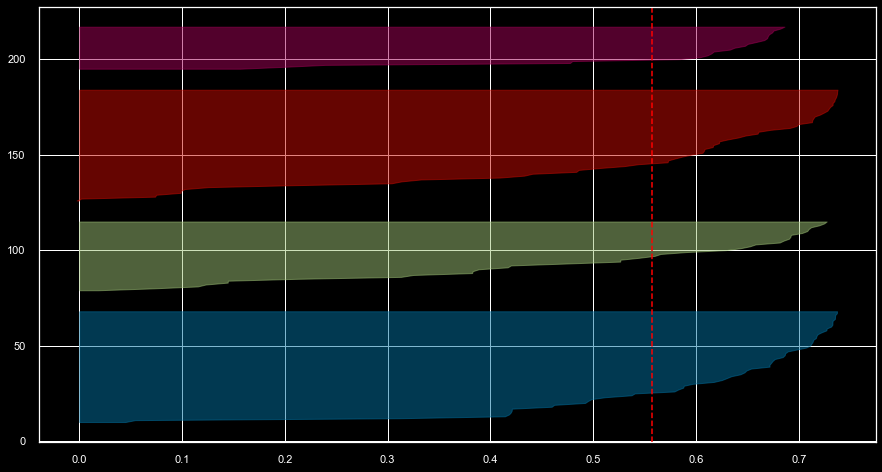

In [22]:
from sklearn import metrics
from sklearn.metrics import silhouette_score

k = 4

# Fit using suggested k=4 
model = KMeans(k, random_state=42)
plt.figure(figsize=(15,8))
model = SilhouetteVisualizer(model, colors='yellowbrick')
model.fit(X) 

preds = model.predict(X)
score = metrics.silhouette_score(X, preds)
print(f'Silouette score when k={k}:',score)

Both techniques gave 4 as the optimal K for this dataset. For an additional visual confirmation the above visual shows the sillouette score for each cluster, a sufficent K will have silouettes that are proportionate with eachother. 

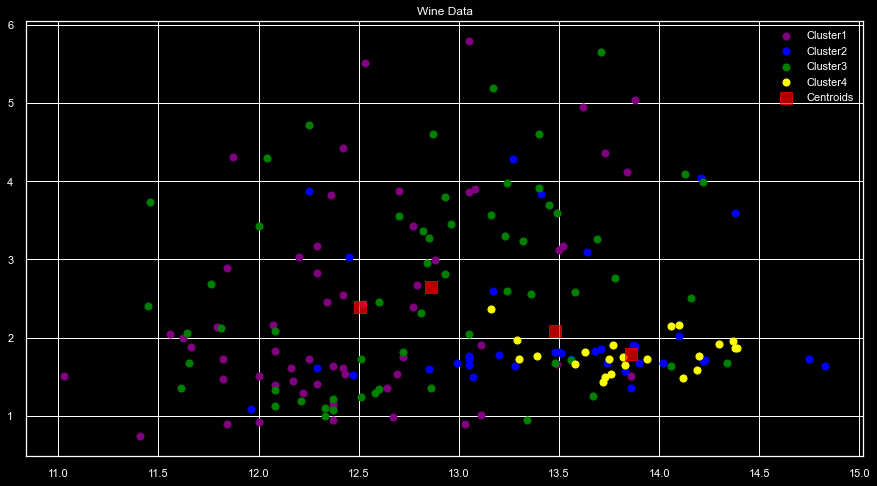

In [24]:
y_means = model.fit_predict(X)
X = np.array(X)

#Visualizing the clusters for k=4
plt.figure(figsize=(15,8))
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='yellow',label='Cluster4')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=150,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Wine Data')
plt.legend()
plt.show()

Clustering the raw data does not produce "good" clusters. This is likely due to high dimensionality, so to midigate this we will fit the data using PCA.

In [25]:
# import libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

mms = MinMaxScaler()
X_mms = mms.fit_transform(X)

print('Number of features before PCA: {}'.format(len(X[0])))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_mms)
print('Number of features after PCA: {}'.format(len(X_pca[0])))

Number of features before PCA: 13
Number of features after PCA: 2


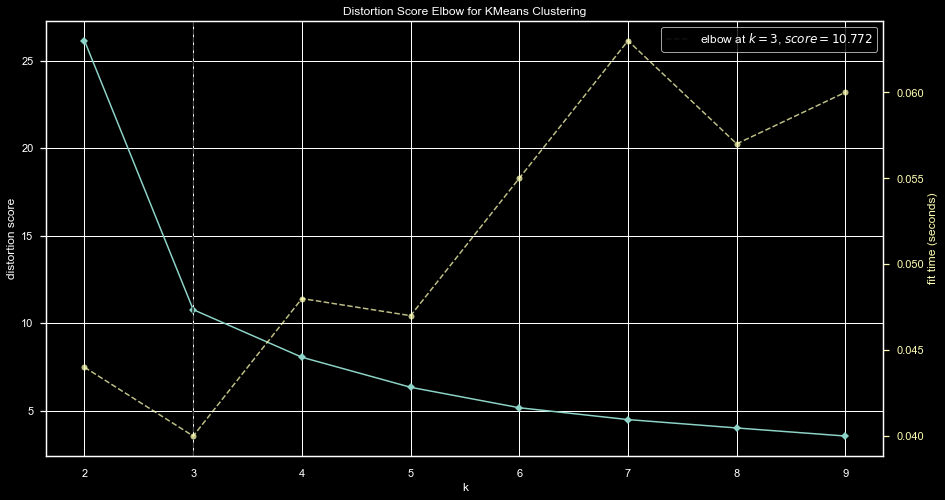

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# import libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# create a kmeans model

model = KMeans(random_state=42)
plt.figure(figsize=(15,8))
# use the KElbowVisualizer to calculate distortion for different numbers of clusters
visualizer = KElbowVisualizer(model, metric='distortion',k=(2,10), figsize=(10,10))
visualizer.fit(X_pca) 
visualizer.show()

Silouette score when k=3: 0.5680591392935428


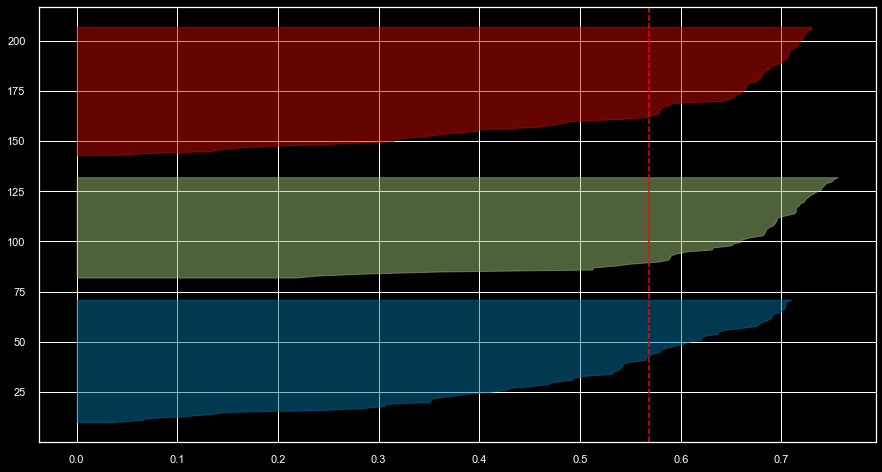

In [27]:
#Generate another kmeans model
from sklearn.metrics import silhouette_score

k = 3

model = KMeans(k, random_state=42)
plt.figure(figsize=(15,8))
model = SilhouetteVisualizer(model, colors='yellowbrick')
model.fit(X_pca)

preds = model.predict(X_pca)
score = metrics.silhouette_score(X_pca, preds)
print(f'Silouette score when k={k}:',score)

FItting the data with PCA gave us an optimal K of 3 and that increases our silouette score. Additionally, the relative proportional of the silouettes above looks better than what was previous seen with the 4 silouettes.

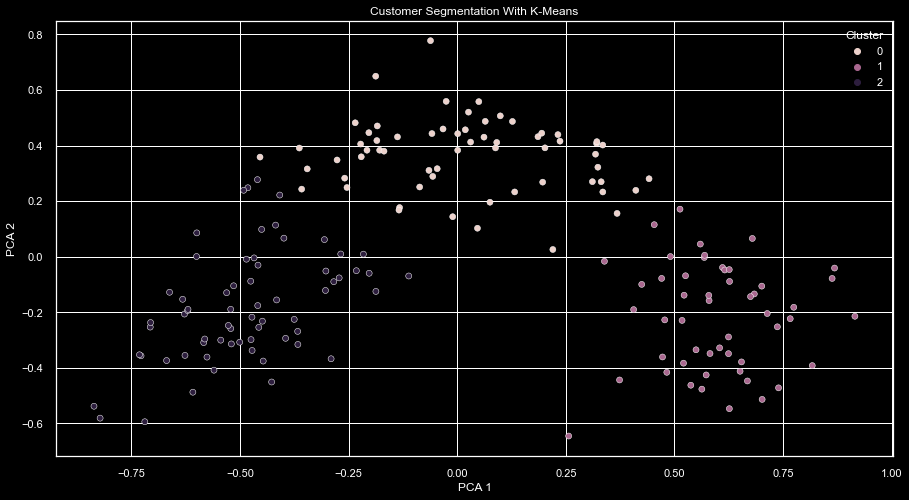

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# first PCA component
pca1 = [val[0] for val in X_pca]
# second PCA component
pca2 = [val[1] for val in X_pca]

# add the cluster and PCA components to the dataframe
df['Cluster'] = preds
df['PCA 1'] = pca1
df['PCA 2'] = pca2

# plot scatter plot
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='PCA 1', y='PCA 2', hue='Cluster')
plt.title('Customer Segmentation With K-Means')
plt.show() 
visualizer.show()

Distinct and well defined clusters after using PCA

df_clusterCount = df.groupby(['Cluster']).size().reset_index().rename({0:'Count'}, axis=1)

<AxesSubplot:xlabel='Cluster', ylabel='Count'>

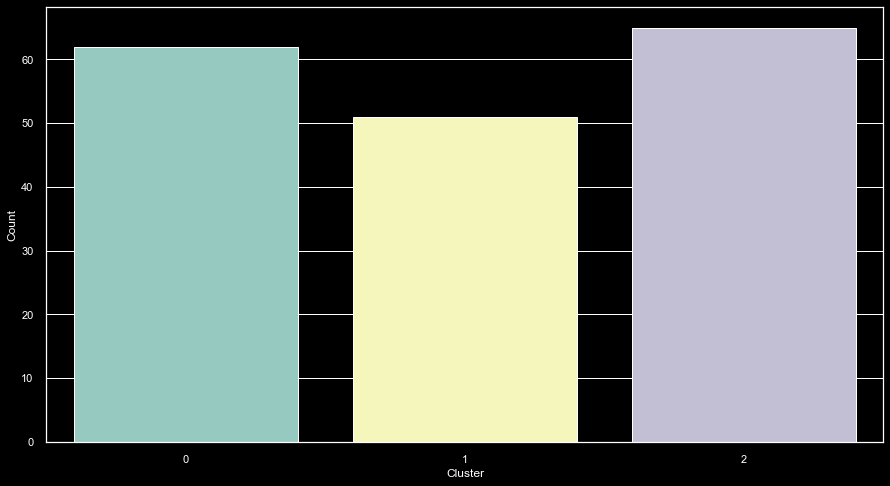

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(x = df_clusterCount.Cluster, y=df_clusterCount.Count)

Most data fell into Cluster 2

V. Conclusion: The results of this analysis were not as significant as what was learned while performing the analysis. For example, the initial results were obtained from untransformed data, producing weak and undifferentiated clusters. When the data was transformed through PCA, the second analysis produced distinct clusters segregated in the last scatter plot of the notebook. The takeaway from this analysis is how important it is to apply sufficient transformations to your data and the power of PCA in reducing data frame dimensionality.      

VI. Sources
- Follow meAjitesh KumarI have been recently working in the area of Data analytics including Data Science and Machine Learning / Deep Learning. I am also passionate about different technologies including programming languages such as Java/JEE. (2020, September 15). Kmeans silhouette score explained with python example. Data Analytics. Retrieved April 17, 2022, from https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/ 
- Vivek, S. (2018, August 13). Clustering algorithms for customer segmentation. Medium. Retrieved April 17, 2022, from https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac 